In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud

In [9]:
# Load the dataset
df = pd.read_csv('data/SMSSpamCollection.csv', sep='\t', names=['label', 'message'])

# Check for missing values
print('Number of missing values:')
print(df.isnull().sum())

# Check for duplicates
print('Number of duplicates:', df.duplicated(subset=['message']).sum())

Number of missing values:
label      0
message    0
dtype: int64
Number of duplicates: 403


In [10]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Check the length of the dataset
print('Unique records:', len(df))

Unique records: 5169


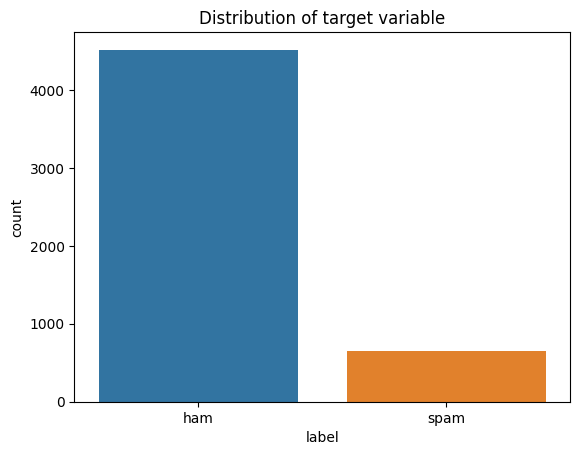

In [11]:
# Distribution of the target variable
sns.countplot(x='label', data=df)
plt.title('Distribution of target variable')
plt.show()

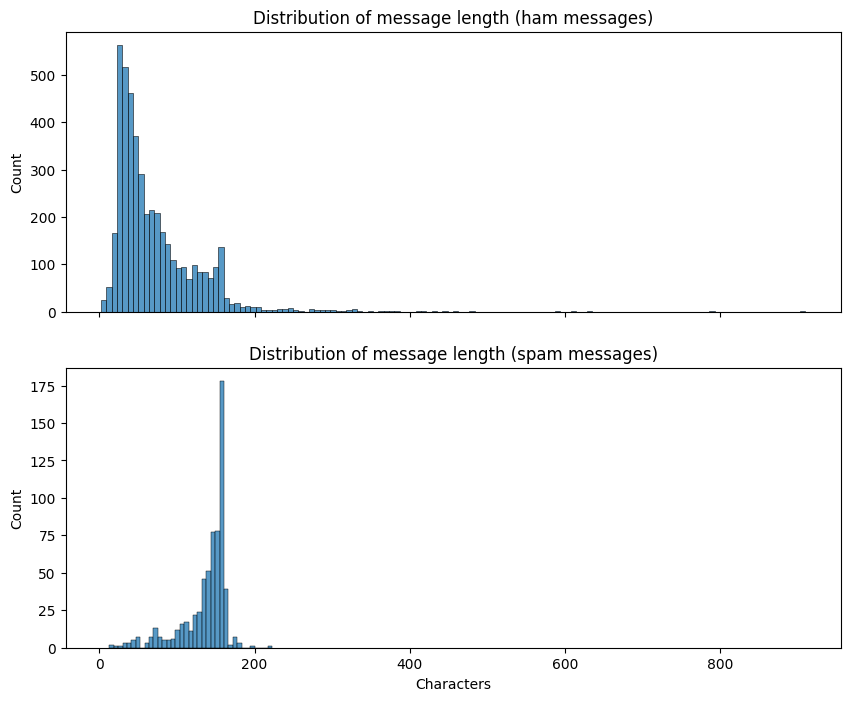

In [23]:
# Plot the distribution of the length of text messages for ham and spam messages
fig, axs = plt.subplots(nrows=2, figsize=(10, 8), sharex=True)
sns.histplot(df[df['label'] == 'ham']['message'].apply(len), ax=axs[0])
sns.histplot(df[df['label'] == 'spam']['message'].apply(len), ax=axs[1])
axs[0].set_title('Distribution of message length (ham messages)')
axs[1].set_title('Distribution of message length (spam messages)')
axs[1].set_xlabel('Characters')
plt.show()

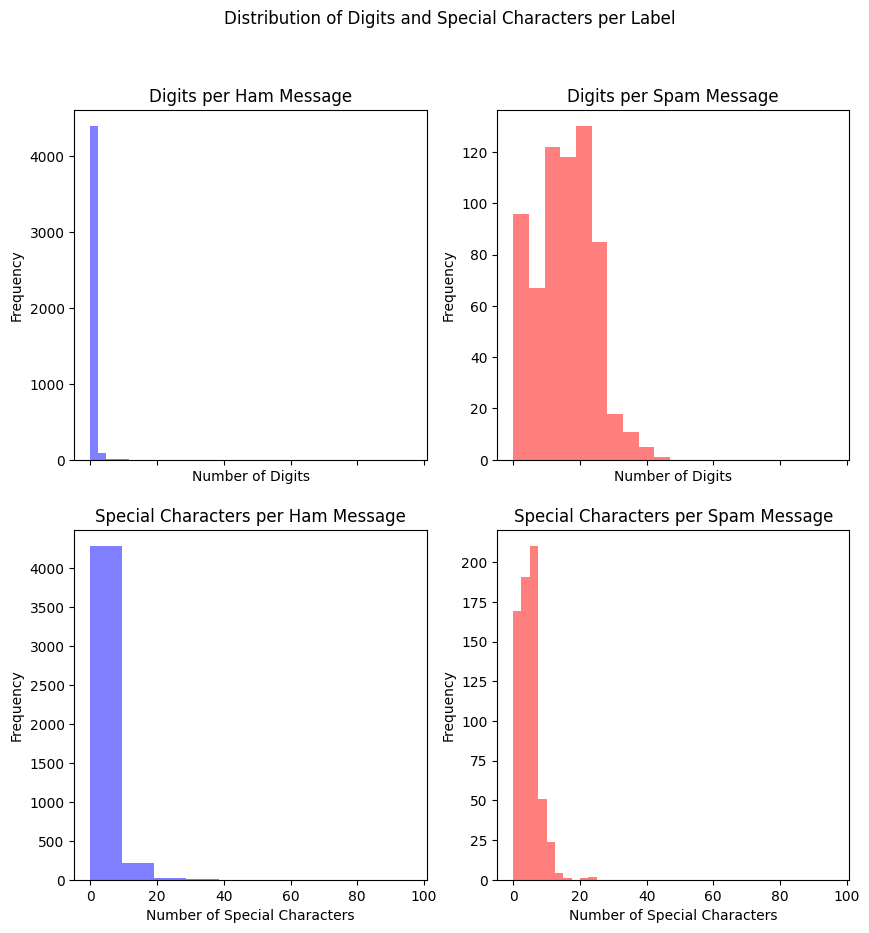

In [14]:
# Define regular expressions to match digits and special characters
digits_regex = r'\d'
special_chars_regex = r'[!@#$%^&*(),.?":{}|<>]'

# Extract the number of digits and special characters per message
df['num_digits'] = df['message'].apply(lambda x: len(re.findall(digits_regex, x)))
df['num_special_chars'] = df['message'].apply(lambda x: len(re.findall(special_chars_regex, x)))

# Create plots to visualize the distribution of digits and special characters per label
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
fig.suptitle('Distribution of Digits and Special Characters per Label')

axs[0, 0].hist(df[df['label']=='ham']['num_digits'], bins=10, alpha=0.5, color='blue')
axs[0, 0].set_title('Digits per Ham Message')
axs[0, 0].set_xlabel('Number of Digits')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(df[df['label']=='spam']['num_digits'], bins=10, alpha=0.5, color='red')
axs[0, 1].set_title('Digits per Spam Message')
axs[0, 1].set_xlabel('Number of Digits')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist(df[df['label']=='ham']['num_special_chars'], bins=10, alpha=0.5, color='blue')
axs[1, 0].set_title('Special Characters per Ham Message')
axs[1, 0].set_xlabel('Number of Special Characters')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(df[df['label']=='spam']['num_special_chars'], bins=10, alpha=0.5, color='red')
axs[1, 1].set_title('Special Characters per Spam Message')
axs[1, 1].set_xlabel('Number of Special Characters')
axs[1, 1].set_ylabel('Frequency')

plt.show()

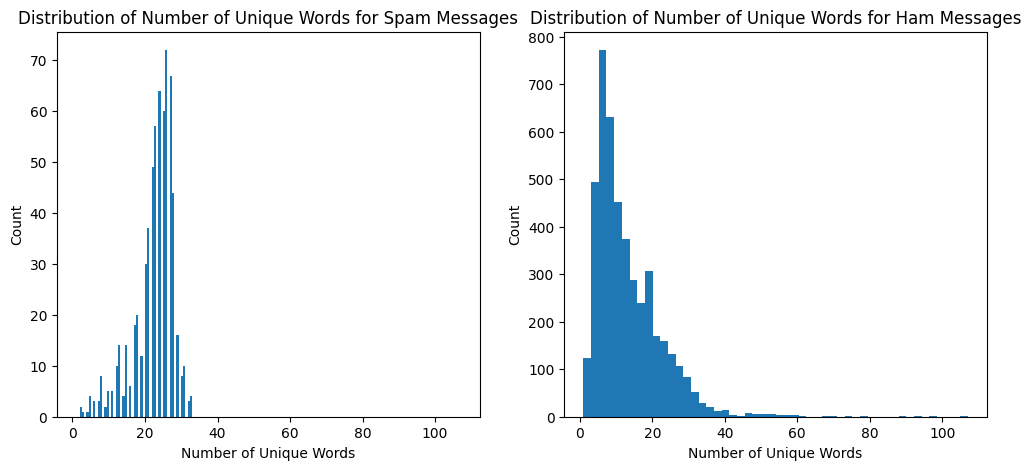

In [16]:
# Calculate the number of unique words for each message
df['num_unique_words'] = df['message'].apply(lambda x: len(set(x.split())))

# Plot the distribution of the number of unique words for spam and ham
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
axs[0].hist(df[df['label'] == 'spam']['num_unique_words'], bins=50)
axs[0].set_title('Distribution of Number of Unique Words for Spam Messages')
axs[0].set_xlabel('Number of Unique Words')
axs[0].set_ylabel('Count')
axs[1].hist(df[df['label'] == 'ham']['num_unique_words'], bins=50)
axs[1].set_title('Distribution of Number of Unique Words for Ham Messages')
axs[1].set_xlabel('Number of Unique Words')
axs[1].set_ylabel('Count')
plt.show()

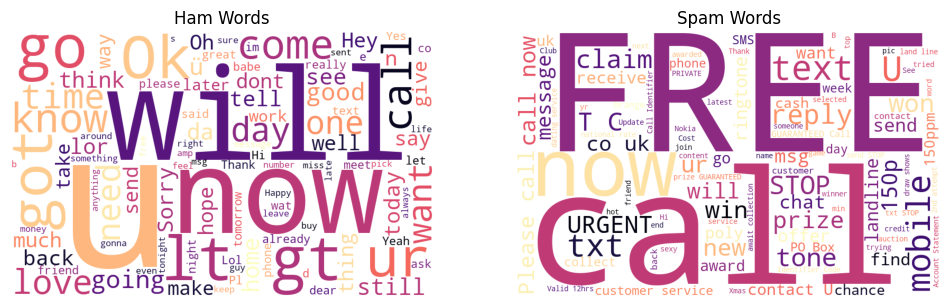

In [20]:
# word cloud for ham messages
ham_words = ' '.join(list(df[df['label'] == 'ham']['message']))
ham_wordcloud = WordCloud(width=800, height=500, background_color='white', max_words=100, colormap='magma').generate(ham_words)

# word cloud for spam messages
spam_words = ' '.join(list(df[df['label'] == 'spam']['message']))
spam_wordcloud = WordCloud(width=800, height=500, background_color='white', max_words=100, colormap='magma').generate(spam_words)

# plot the word clouds side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(ham_wordcloud)
axes[0].set_title('Ham Words')
axes[0].axis('off')
axes[1].imshow(spam_wordcloud)
axes[1].set_title('Spam Words')
axes[1].axis('off')
plt.show()